<h1 align="center"><font color="yellow">RAG Evaluation</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [ragas](https://github.com/explodinggradients/ragas/tree/main)

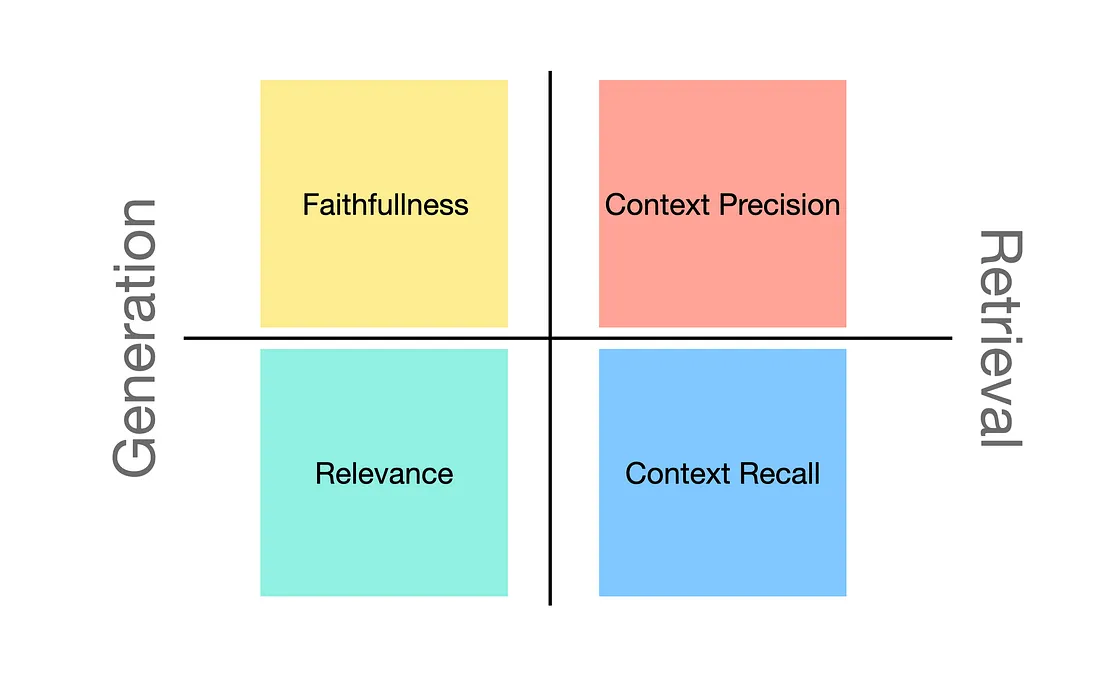

# Contextualizando

<font color="orange">`Retrieval Augmented Generation` (RAG) é uma estrutura ou classe muito popular de aplicativo `LLM`. O princípio básico do `RAG` é aproveitar fontes de dados externas para fornecer referência contextual aos `LLMs`. Aqui vamos aprender a como avaliar, medir e quantificar o desempenho de um `pipeline RAG?`</font>


Qualquer implementação `RAG` tem dois aspectos: `Geração e Recuperação`. O contexto é estabelecido através do processo de recuperação. A geração é realizada pelo LLM, que gera a resposta a partir das informações recuperadas.

Ao avaliar um pipeline RAG, ambos os elementos precisam ser avaliados separadamente e em conjunto para obter uma pontuação geral (overall), bem como as pontuações individuais para identificar os aspectos a serem melhorados.

[Ragas](https://github.com/explodinggradients/ragas/tree/main) usa `LLMs` para avaliar pipelines RAG, ao mesmo tempo que fornece métricas acionáveis ​​​​usando o mínimo de dados anotados possível.

<font color="red">Ragas faz referência aos seguintes dados:</font>

`Question:` Estas são as questões nas quais seu `pipeline RAG` será avaliado.

`Answer:` A resposta gerada a partir do `pipeline RAG` e apresentada ao usuário.

`Contexts:` Os contextos passados ​​para o LLM para responder à pergunta.

`Ground Truths:`` A resposta verdadeira às perguntas.

<font color="red">A seguinte saída é produzida por `Ragas`:</font>

`Retrieval:` `context_relevancy` e `context_recall` que representa a medida do desempenho do seu **sistema de recuperação**.

<font color="pink">Generation:</font>

`faithfulness` que mede as alucinações e `answer_relevancy` que mede as respostas à relevância das questões.

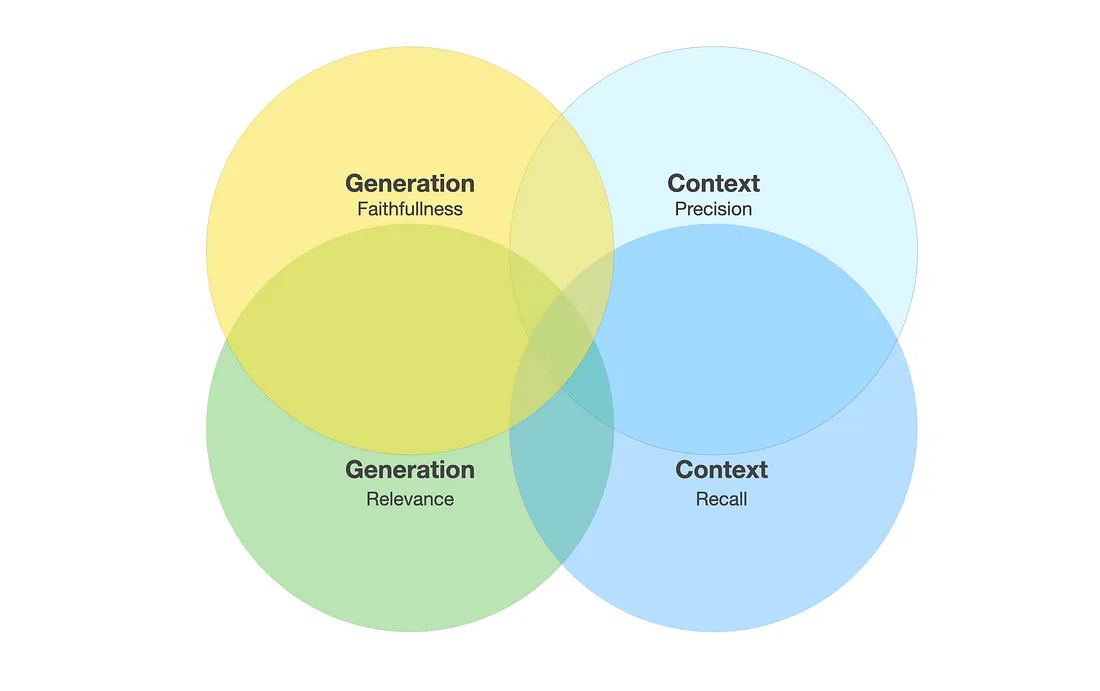

<font color="orange">A `média harmônica` desses $4$ aspectos fornece a pontuação `ragas`, que é uma medida única do desempenho do seu sistema de `QA` em todos os aspectos importantes. ([Fonte](https://blog.langchain.dev/evaluating-rag-pipelines-with-ragas-langsmith/)).</font>

Considerando os dados, as perguntas devem ser representativas das dúvidas dos usuários.

O exemplo abaixo usa um conjunto de dados com os campos para: `Index`, `Question`, `Ground Truth`, `Answer` e `Reference Context`.

Aqui está um exemplo completo de código funcional para executar seu próprio aplicativo, tudo que você precisa é de uma chave de `API OpenAI`, conforme visto abaixo.

```
%pip install ragas

%pip install tiktoken
```

# <font color="red">Setup</font>

In [ ]:
#%pip install ragas tiktoken

In [5]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file


In [7]:
# data
from datasets import load_dataset

fiqa_eval = load_dataset("explodinggradients/fiqa", "ragas_eval") # https://huggingface.co/datasets/explodinggradients/fiqa/viewer/ragas_eval/train
fiqa_eval


DatasetDict({
    baseline: Dataset({
        features: ['question', 'ground_truths', 'answer', 'contexts'],
        num_rows: 30
    })
})

In [9]:
# Vamos 
import pandas as pd

df_eddy =pd.DataFrame(fiqa_eval)
df_eddy.head(2)


,baseline
0,{'question': 'How to deposit a cheque issued t...
1,{'question': 'Can I send a money order from US...


In [10]:
df_eddy['baseline'].iloc[0]

{'question': 'How to deposit a cheque issued to an associate in my business into my business account?',
 'ground_truths': ["Have the check reissued to the proper payee.Just have the associate sign the back and then deposit it.  It's called a third party cheque and is perfectly legal.  I wouldn't be surprised if it has a longer hold period and, as always, you don't get the money if the cheque doesn't clear. Now, you may have problems if it's a large amount or you're not very well known at the bank.  In that case you can have the associate go to the bank and endorse it in front of the teller with some ID.  You don't even technically have to be there.  Anybody can deposit money to your account if they have the account number. He could also just deposit it in his account and write a cheque to the business."],
 'answer': '\nThe best way to deposit a cheque issued to an associate in your business into your business account is to open a business account with the bank. You will need a state-is

In [12]:
from ragas.metrics import (context_relevancy,
                           answer_relevancy,
                           faithfulness,
                           context_recall,
                          )


from ragas.metrics.critique import harmfulness

from ragas import evaluate

result = evaluate(
    fiqa_eval["baseline"].select(range(3)),
    metrics=[
        context_relevancy,
        faithfulness,
        answer_relevancy,
        context_recall,
        harmfulness,
    ],
)

result

evaluating with [context_ relevancy]


100%|██████████| 1/1 [00:04<00:00,  4.85s/it]


evaluating with [faithfulness]


100%|██████████| 1/1 [00:23<00:00, 23.33s/it]


evaluating with [answer_relevancy]


100%|██████████| 1/1 [00:06<00:00,  6.15s/it]


evaluating with [context_recall]


100%|██████████| 1/1 [00:14<00:00, 14.46s/it]


evaluating with [harmfulness]


100%|██████████| 1/1 [00:06<00:00,  6.30s/it]


{'ragas_score': 0.3483, 'context_ relevancy': 0.1296, 'faithfulness': 0.8889, 'answer_relevancy': 0.9326, 'context_recall': 0.6370, 'harmfulness': 0.0000}

<font color="orange">Visualizamos os dados:</font>

In [17]:
df = result.to_pandas()
df.head()


,question,ground_truths,answer,contexts,context_ relevancy,faithfulness,answer_relevancy,context_recall,harmfulness
0,How to deposit a cheque issued to an associate...,[Have the check reissued to the proper payee.J...,\nThe best way to deposit a cheque issued to a...,[Just have the associate sign the back and the...,0.088301,0.666667,0.977347,0.111111,0
1,Can I send a money order from USPS as a business?,[Sure you can. You can fill in whatever you w...,"\nYes, you can send a money order from USPS as...",[Sure you can. You can fill in whatever you w...,0.231011,1.000000,0.898973,0.800000,0
2,1 EIN doing business under multiple business n...,[You're confusing a lot of things here. Compan...,"\nYes, it is possible to have one EIN doing bu...",[You're confusing a lot of things here. Compan...,0.069420,1.000000,0.921492,1.000000,0


<font color="orange">O print acima: a `question` está visível, o texto `ground truth` e a `answer` com o contexto. À direita está a pontuação de `context relevancy`, pontuação de fidelidade (faithfulness), relevância da resposta (`answer relevancy`), context-recall e pontuações de nocividade (`harmfulness`).</font>